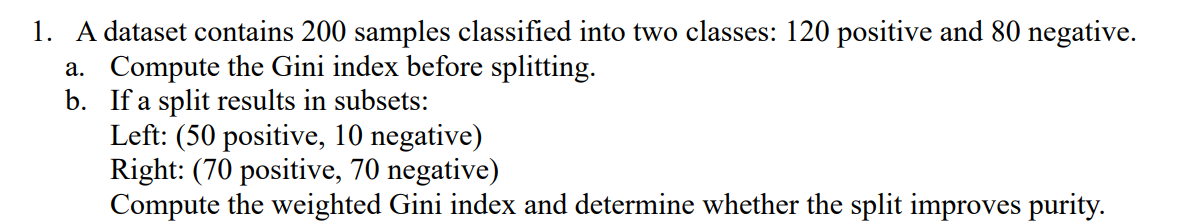

**given**

We have a dataset of 200 samples:

* 120 positive (P)
* 80 negative (N)

#### **1(a) Gini Index before splitting**

For a binary classification, the Gini index is:

$$
\text{Gini} = 1 - p_1^2 - p_2^2
$$

Where:

* $p_1 =$ fraction of positive examples
* $p_2 =$ fraction of negative examples



since

* Total samples = 200
* $p_1 = \frac{120}{200} = 0.6$
* $p_2 = \frac{80}{200} = 0.4$

$$
\text{Gini} = 1 - (0.6)^2 - (0.4)^2 = 1 - 0.36 - 0.16 = \boxed{0.48}
$$



---

####  **1(b) Gini Index after a specific split**

The split results in:

* **Left subset**: 50 positive, 10 negative → 60 samples
* **Right subset**: 70 positive, 70 negative → 140 samples

Let’s compute the **Gini impurity for each subset**, and then compute the **weighted Gini**.

---

##### **Left Subset (60 samples):**

* Positive = 50 ⇒ $p_1 = \frac{50}{60} = 0.8333$
* Negative = 10 ⇒ $p_2 = \frac{10}{60} = 0.1667$

$$
\text{Gini}_{\text{left}} = 1 - (0.8333)^2 - (0.1667)^2
= 1 - 0.6944 - 0.0278 = \boxed{0.2778}
$$

---

##### **Right Subset (140 samples):**

* Positive = 70 ⇒ $p_1 = \frac{70}{140} = 0.5$
* Negative = 70 ⇒ $p_2 = \frac{70}{140} = 0.5$

$$
\text{Gini}_{\text{right}} = 1 - (0.5)^2 - (0.5)^2 = 1 - 0.25 - 0.25 = \boxed{0.5}
$$

---

##### **Compute Weighted Gini Index**

The weighted Gini is:

$$
\text{Gini}_{\text{weighted}} = \frac{60}{200} \cdot \text{Gini}_{\text{left}} + \frac{140}{200} \cdot \text{Gini}_{\text{right}}
$$

$$
= 0.3 \cdot 0.2778 + 0.7 \cdot 0.5 = 0.0833 + 0.35 = \boxed{0.4333}
$$

---


* **Before splitting**: Gini = 0.48
* **After splitting**: Gini = 0.4333
* **Decrease in impurity** = 0.48 – 0.4333 = **0.0467**

Since the Gini impurity **decreased**, this split is considered to have **improved the purity** of the data.


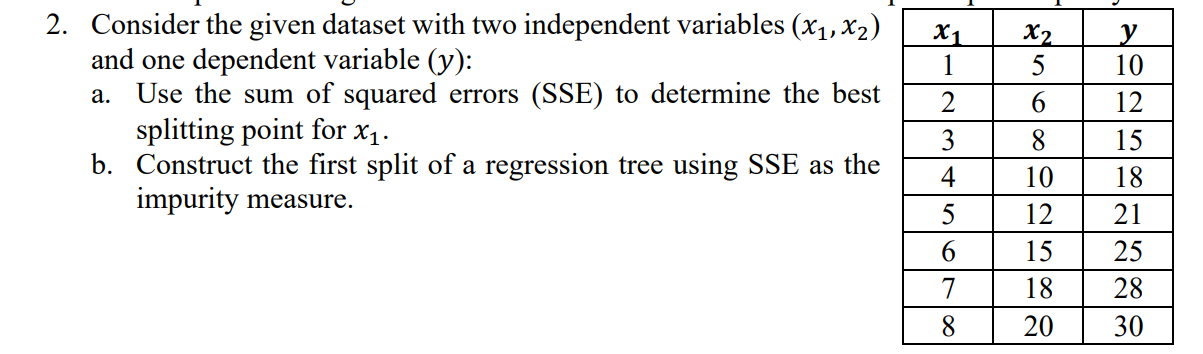

The **Sum of Squared Errors (SSE)** is calculated as:

$$
\text{SSE} = \sum_{i}(y_i - \bar{y})^2
$$

Where:

* $\bar{y}$ = mean of y values in the group
* SSE measures how much variation there is in y from the mean

We want to **split the data on x₁** and find the point where **SSE is minimized**

Possible Split Points for x₁:

We can only split between the values of x₁. Possible split points:

```
(1+2)/2 = 1.5
(2+3)/2 = 2.5
(3+4)/2 = 3.5
(4+5)/2 = 4.5
(5+6)/2 = 5.5
(6+7)/2 = 6.5
(7+8)/2 = 7.5
```

For each split point:

* Divide data into two groups:

  * Left: x₁ ≤ split
  * Right: x₁ > split
* Compute mean of y in each group
* Compute SSE for both groups
* Add them → total SSE

Summary

| Split at x₁ | Total SSE        |
| ----------- | ---------------- |
| 1.5         | 331.0            |
| 2.5         | 205.0            |
| 3.5         | 125.0            |
| **4.5**     | **82.75**        |
| 5.5         | 92.0             |
| 6.5         | 125.5            |
| 7.5         | 166.0            |

 The best split occurs at **x₁ = 4.5**, with **minimum SSE = 82.75**

---

##### Part (b): Build the First Split of a Regression Tree Using SSE

Now that we know the best split is at **x₁ = 4.5**, we split the data into:

* **Left node (x₁ ≤ 4.5)**: x₁ = 1, 2, 3, 4 → y = \[10, 12, 15, 18] → mean = 13.75
* **Right node (x₁ > 4.5)**: x₁ = 5, 6, 7, 8 → y = \[21, 25, 28, 30] → mean = 26.0

#### Regression Tree (First Split Only):

```
           x₁ <= 4.5
          /        \
     y = 13.75     y = 26.0
```
---

#### Final Answer

##### **(a)** Best split point on **x₁ = 4.5**

* SSE is minimized at this point: **Total SSE = 82.75**

##### **(b)** First split of the regression tree:

* Split on **x₁ ≤ 4.5**
* Predictions:

  * Left: y = 13.75
  * Right: y = 26.0


Best split point on x1: 4.5
Minimum Total SSE: 82.75


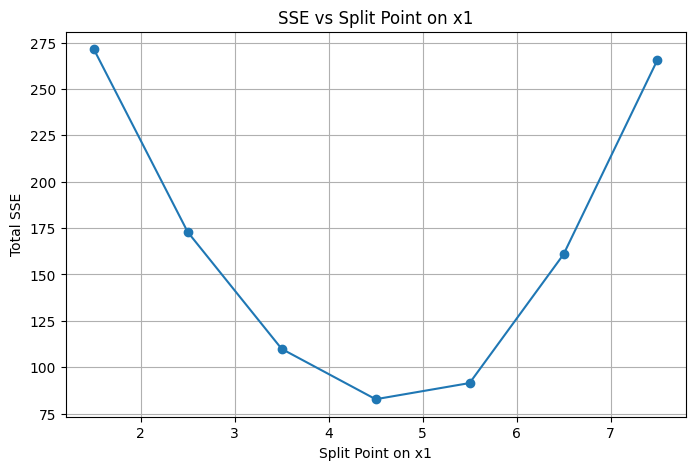

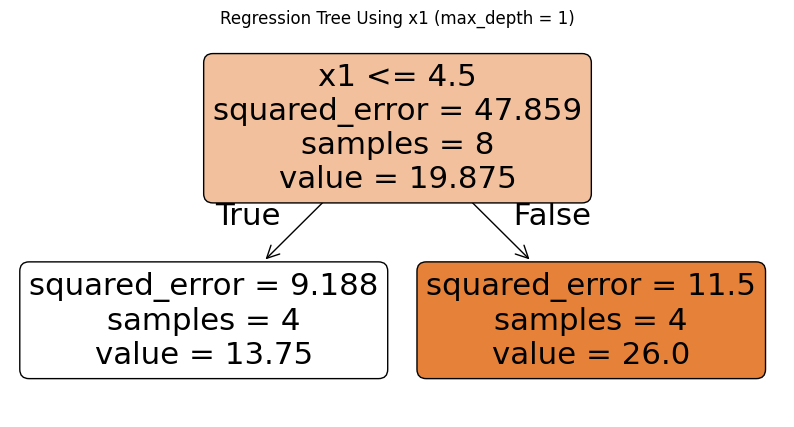

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# dataset
data = {
    'x1': [1, 2, 3, 4, 5, 6, 7, 8],
    'x2': [5, 6, 8, 10, 12, 15, 18, 20],
    'y':  [10, 12, 15, 18, 21, 25, 28, 30]
}
df = pd.DataFrame(data)

# Compute SSE for all possible split points on x1
splits = [(df['x1'][i] + df['x1'][i+1]) / 2 for i in range(len(df['x1']) - 1)]
sse_results = []

for split in splits:
    left = df[df['x1'] <= split]
    right = df[df['x1'] > split]

    mean_left = left['y'].mean()
    mean_right = right['y'].mean()

    sse_left = ((left['y'] - mean_left) ** 2).sum()
    sse_right = ((right['y'] - mean_right) ** 2).sum()

    total_sse = sse_left + sse_right
    sse_results.append((split, total_sse))

# Store SSE results and find best split
sse_df = pd.DataFrame(sse_results, columns=['Split_x1', 'Total_SSE'])
best_split = sse_df.loc[sse_df['Total_SSE'].idxmin()]
print("Best split point on x1:", best_split['Split_x1'])
print("Minimum Total SSE:", best_split['Total_SSE'])

# Plot SSE vs split point
plt.figure(figsize=(8, 5))
plt.plot(sse_df['Split_x1'], sse_df['Total_SSE'], marker='o')
plt.xlabel("Split Point on x1")
plt.ylabel("Total SSE")
plt.title("SSE vs Split Point on x1")
plt.grid(True)
plt.show()

# Train a regression tree using x1 only (max_depth=1)
reg_tree = DecisionTreeRegressor(max_depth=1)
reg_tree.fit(df[['x1']], df['y'])

# Plot the regression tree
plt.figure(figsize=(10, 5))
plot_tree(reg_tree, feature_names=['x1'], filled=True, rounded=True)
plt.title("Regression Tree Using x1 (max_depth = 1)")
plt.show()

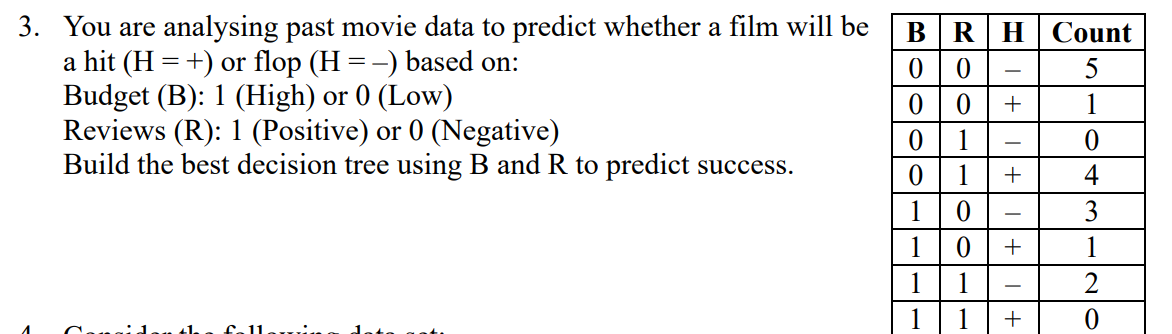

 Since building the **best decision tree** using `Budget (B)` and `Reviews (R)` to predict whether a **movie is a Hit (+)** or **Flop (–)**.

So need to
Predict **Hit (H = +)** or **Flop (H = –)** using:

* Budget (B): 0 = Low, 1 = High
* Reviews (R): 0 = Negative, 1 = Positive

#### Given Frequency Table:

| B (Budget) | R (Review) | H (Hit/Flop) | Count |
| ---------- | ---------- | ------------ | ----- |
| 0          | 0          | –            | 5     |
| 0          | 0          | +            | 1     |
| 0          | 1          | –            | 0     |
| 0          | 1          | +            | 4     |
| 1          | 0          | –            | 3     |
| 1          | 0          | +            | 1     |
| 1          | 1          | –            | 2     |
| 1          | 1          | +            | 0     |

Let’s convert this into a **data table**:

| B | R | Label | Count |
| - | - | ----- | ----- |
| 0 | 0 | –     | 5     |
| 0 | 0 | +     | 1     |
| 0 | 1 | –     | 0     |
| 0 | 1 | +     | 4     |
| 1 | 0 | –     | 3     |
| 1 | 0 | +     | 1     |
| 1 | 1 | –     | 2     |
| 1 | 1 | +     | 0     |

---

#### Total Entropy (before any split)

 calculating entropy to measure impurity.

$$
\text{Entropy} = -p_+ \log_2 p_+ - p_- \log_2 p_-
$$

#### Total Counts:

* Total + = 1 + 4 + 1 + 0 = **6**
* Total – = 5 + 0 + 3 + 2 = **10**
* Total = 16

$$
p_+ = \frac{6}{16} = 0.375,\quad p_- = \frac{10}{16} = 0.625
$$

$$
\text{Entropy}_{\text{total}} = -0.375 \log_2(0.375) - 0.625 \log_2(0.625)
\approx 0.954
$$

---

#### Try splitting on Budget (B)

#### Group B = 0:

* (0,0): 5 –, 1 +
* (0,1): 0 –, 4 +
* Total: 10
* Pos = 5, Neg = 5 →
  $p_+ = 0.5,\ p_- = 0.5$

  $$
  \text{Entropy}_B=0 = -0.5 \log_2(0.5) - 0.5 \log_2(0.5) = 1.0
  $$

#### Group B = 1:

* (1,0): 3 –, 1 +
* (1,1): 2 –, 0 +
* Total: 6
* Pos = 1, Neg = 5
  $p_+ = \frac{1}{6},\ p_- = \frac{5}{6}$

$$
\text{Entropy}_B=1 = -\left( \frac{1}{6} \log_2 \frac{1}{6} + \frac{5}{6} \log_2 \frac{5}{6} \right)
\approx -[0.431 + 0.219] = 0.650
$$

#### Weighted Entropy for split on **B**:

$$
E_B = \frac{10}{16} \cdot 1.0 + \frac{6}{16} \cdot 0.650 = 0.906
$$

**Information Gain (IG)** from split on B:

$$
IG_B = 0.954 - 0.906 = \boxed{0.048}
$$

---

#### Try splitting on **Review (R)**

### Group R = 0:

* (0,0): 5 –, 1 +
* (1,0): 3 –, 1 +
* Total = 10
* Pos = 2, Neg = 8

  $$
  p_+ = 0.2,\quad p_- = 0.8
  $$

$$
\text{Entropy}_R=0 = -0.2 \log_2 0.2 - 0.8 \log_2 0.8
\approx 0.722
$$

### Group R = 1:

* (0,1): 0 –, 4 +
* (1,1): 2 –, 0 +
* Total = 6
* Pos = 4, Neg = 2
  $p_+ = \frac{4}{6},\ p_- = \frac{2}{6}$

$$
\text{Entropy}_R=1 = -\left( \frac{4}{6} \log_2 \frac{4}{6} + \frac{2}{6} \log_2 \frac{2}{6} \right)
\approx 0.918
$$

### Weighted Entropy for split on **R**:

$$
E_R = \frac{10}{16} \cdot 0.722 + \frac{6}{16} \cdot 0.918 = 0.806
$$

**Information Gain (IG)** from split on R:

$$
IG_R = 0.954 - 0.806 = \boxed{0.148}
$$

---

#### Selecting best attribute

| Attribute  | Info Gain   |
| ---------- | ----------- |
| Budget (B) | 0.048       |
| Review (R) | **0.148**   |

So, **Review (R)** should be the **root node** of the tree.

---

```

Using majority labels in leaf nodes:

### Breakdown:

* R = 0:

  * B = 0 → (5 –, 1 +) → Predict: **Flop (–)**
  * B = 1 → (3 –, 1 +) → Predict: **Flop (–)**
* R = 1:

  * B = 0 → (0 –, 4 +) → Predict: **Hit (+)**
  * B = 1 → (2 –, 0 +) → Predict: **Flop (–)**

---


```
if R == 0:
    Predict = Flop
else:
    if B == 0:
        Predict = Hit
    else:
        Predict = Flop
```


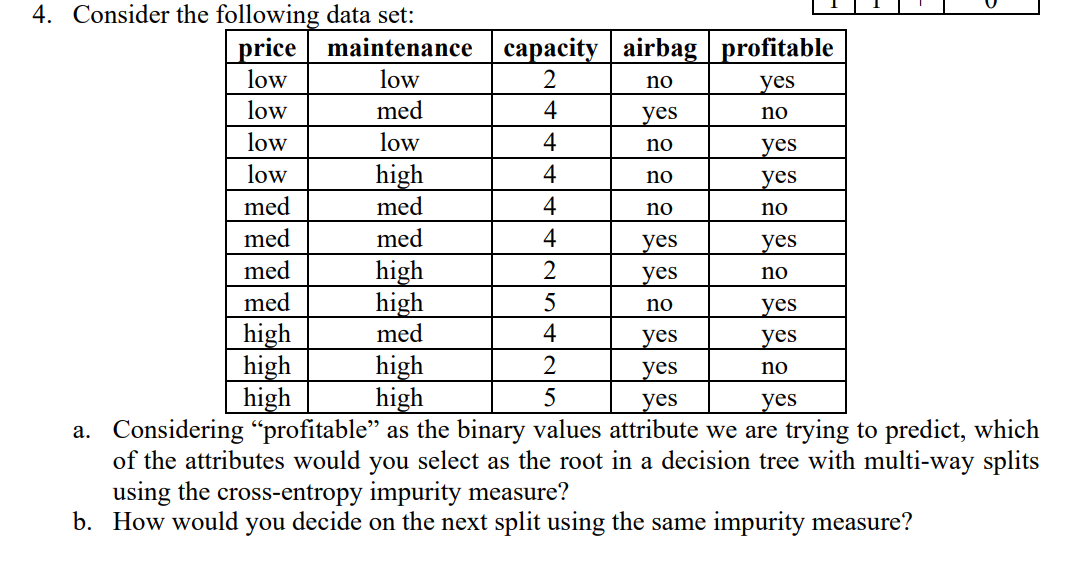


#### Decision Tree using Cross-Entropy Impurity**

**(a) Selecting the Root Attribute**

To determine the best root, we compute the **weighted cross-entropy** for each attribute:

| Attribute    | Weighted Entropy   |
| ------------ | ------------------ |
| **capacity** | **0.441**(best) |
| maintenance  | 0.737              |
| price        | 0.932              |
| airbag       | 0.942              |

* **capacity** gives the **lowest entropy**, meaning it best separates the data.

 **Answer (a):** The best attribute for the root node is **`capacity`**.

---

**(b) Next Best Split After Root**

* Splitting on `capacity` gives 3 branches:

  * capacity = 2: All "no" → pure node → no split needed
  * capacity = 5: All "yes" → pure node → no split needed
  * capacity = 4: Mixed → further splitting required

We then evaluate attributes (price, maintenance, airbag) on the **subset where capacity = 4** to find the next best split.

**Answer (b):** For the node where `capacity = 4`, perform a cross-entropy calculation again on the remaining attributes. The attribute with the lowest entropy in this subset becomes the **next split**.


### Final answer:

* **Root node:** `capacity`
* **Further split needed only on:** `capacity = 4` group
* **Next best attribute:** Determined by applying entropy on that subgroup

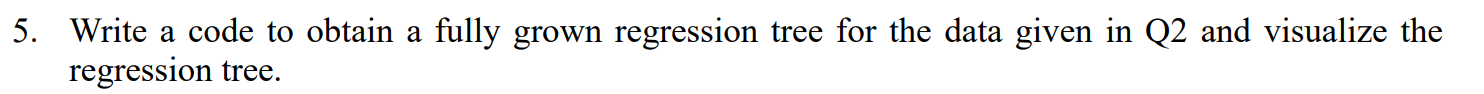

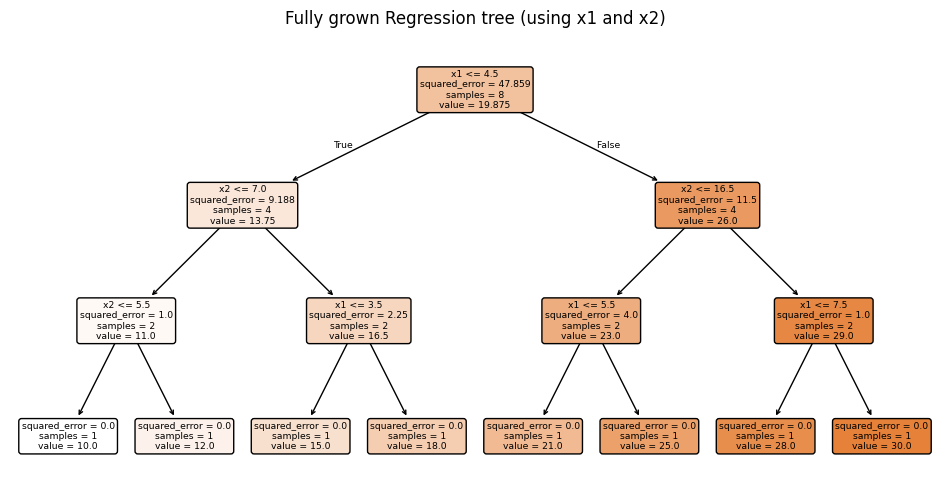

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

#  the dataset
data = {
    'x1': [1, 2, 3, 4, 5, 6, 7, 8],
    'x2': [5, 6, 8, 10, 12, 15, 18, 20],
    'y':  [10, 12, 15, 18, 21, 25, 28, 30]
}
df = pd.DataFrame(data)

#  Fiting a fully grown regression tree (no max depth limit)
reg_tree = DecisionTreeRegressor()
reg_tree.fit(df[['x1', 'x2']], df['y'])

#  Visualize the regression tree
plt.figure(figsize=(12, 6))
plot_tree(reg_tree, feature_names=['x1', 'x2'], filled=True, rounded=True)
plt.title("Fully grown Regression tree (using x1 and x2)")
plt.show()

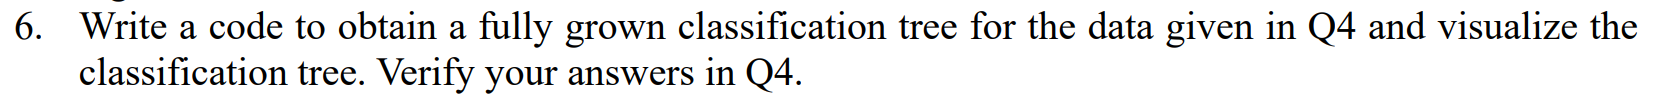

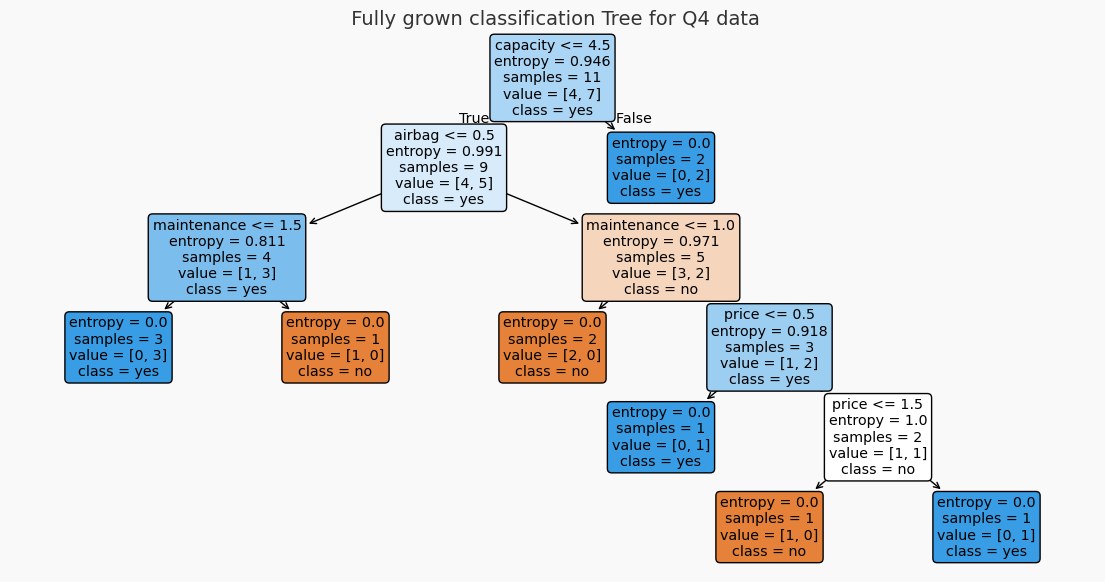

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the dataset
data = {
    'price':       ['low', 'low', 'low', 'low', 'med', 'med', 'med', 'med', 'high', 'high', 'high'],
    'maintenance': ['low', 'med', 'low', 'high', 'med', 'med', 'high', 'high', 'med', 'high', 'high'],
    'capacity':    [2, 4, 4, 4, 4, 4, 2, 5, 4, 2, 5],
    'airbag':      ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes'],
    'profitable':  ['yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes']
}

df = pd.DataFrame(data)

# Encode categorical features
le = LabelEncoder()
for col in ['price', 'maintenance', 'airbag', 'profitable']:
    df[col] = le.fit_transform(df[col])

#  Define features and label
X = df.drop(columns='profitable')
y = df['profitable']

# Train a fully grown classification tree
clf = DecisionTreeClassifier(criterion='entropy')  # Fully grown by default
clf.fit(X, y)

# Visualize the classification tree
plt.figure(figsize=(14, 7), facecolor="#f9f9f9")
plot_tree(clf, feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)
plt.title(" Fully grown classification Tree for Q4 data", fontsize=14, color="#333333")
plt.show()

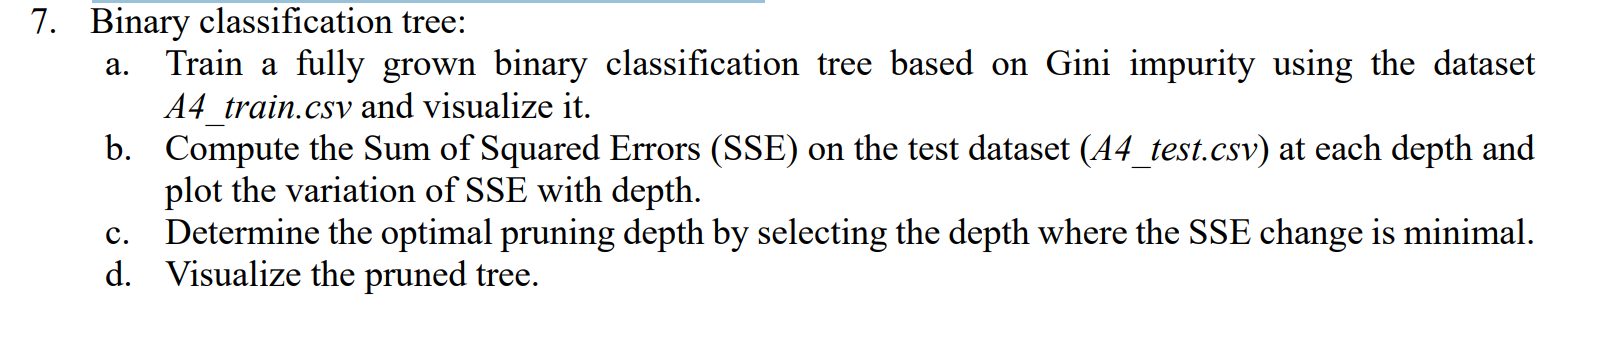

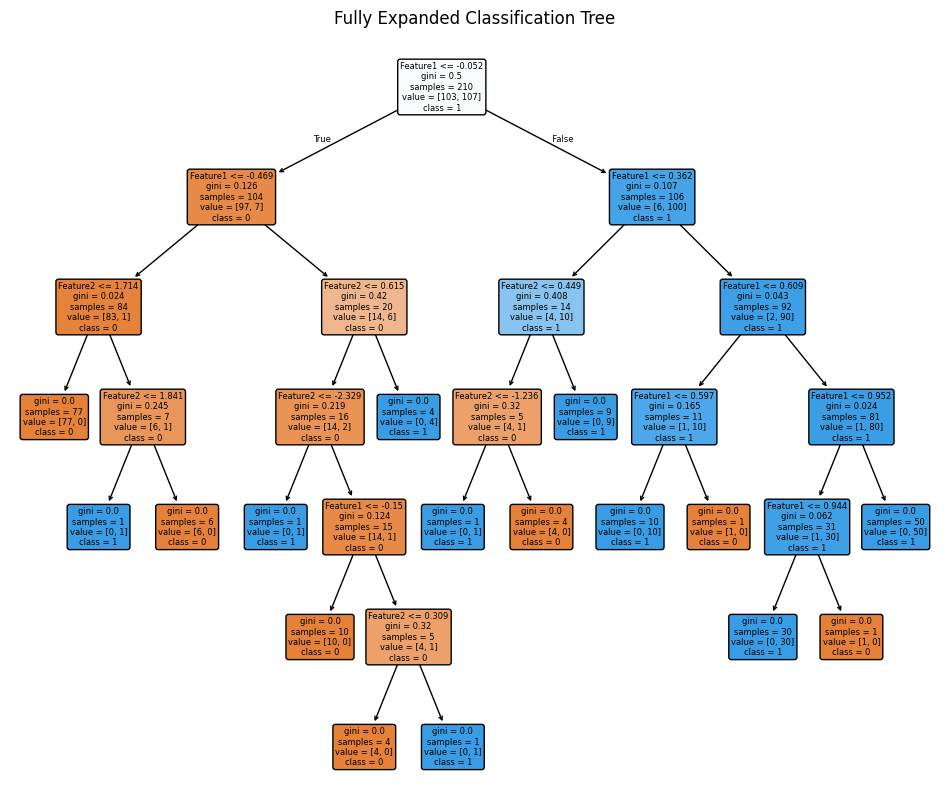

In [37]:
# part a:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error

# Define file paths for training and testing datasets
train_file = "/content/A4_train.csv"
test_file = "/content/A4_test.csv"

#  datasets
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Extract features and labels
X_train_data, y_train_data = train_data[['Feature1', 'Feature2']], train_data['Label']
X_test_data, y_test_data = test_data[['Feature1', 'Feature2']], test_data['Label']

# Build a Decision Tree Classifier using the Gini criterion
dt_classifier = DecisionTreeClassifier(criterion="gini")
dt_classifier.fit(X_train_data, y_train_data)

# Visualize the fully grown decision tree
plt.figure(figsize=(12, 10))
plot_tree(dt_classifier, feature_names=['Feature1', 'Feature2'], class_names=['0', '1'], filled=True, rounded=True)
plt.title("Fully Expanded Classification Tree")
plt.show()

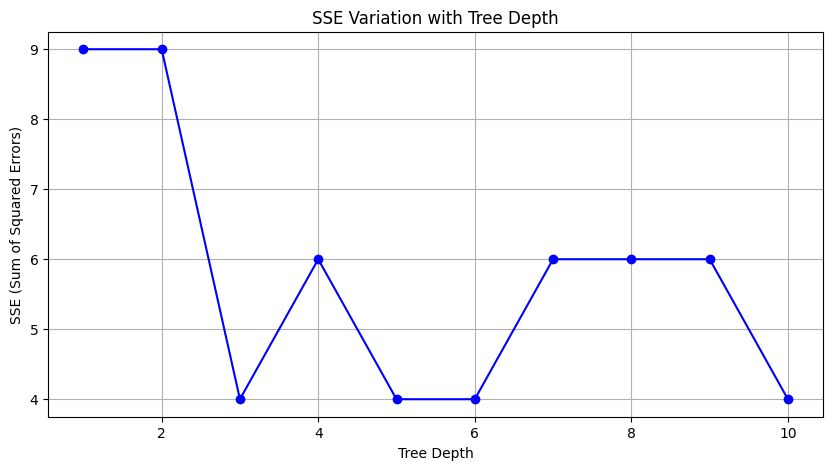

Optimal Pruning Depth: 1


In [39]:
# Part (b): Compute SSE at each depth
max_depths = list(range(1, 11))  # Exploring depths from 1 to 10
sse_results = []  # Storing SSE values for each depth

for depth in max_depths:
    tree_pruned = DecisionTreeClassifier(criterion="gini", max_depth=depth)
    tree_pruned.fit(X_train_data, y_train_data)

    predicted_labels = tree_pruned.predict(X_test_data)  # Generate predictions
    sse_value = np.sum((y_test_data - predicted_labels) ** 2)  # Compute SSE
    sse_results.append(sse_value)  # Store SSE value

# Plot SSE values against tree depth
plt.figure(figsize=(10, 5))
plt.plot(max_depths, sse_results, marker='o', linestyle='-', color='blue')
plt.xlabel("Tree Depth")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("SSE Variation with Tree Depth")
plt.grid()
plt.show()

# part C: Identifying Optimal Pruning Depth
sse_changes = np.diff(sse_results)  # Compute differences in SSE between depths
best_depth = max_depths[np.argmin(np.abs(sse_changes))]  # Depth with least SSE variation
print(f"Optimal Pruning Depth: {best_depth}")

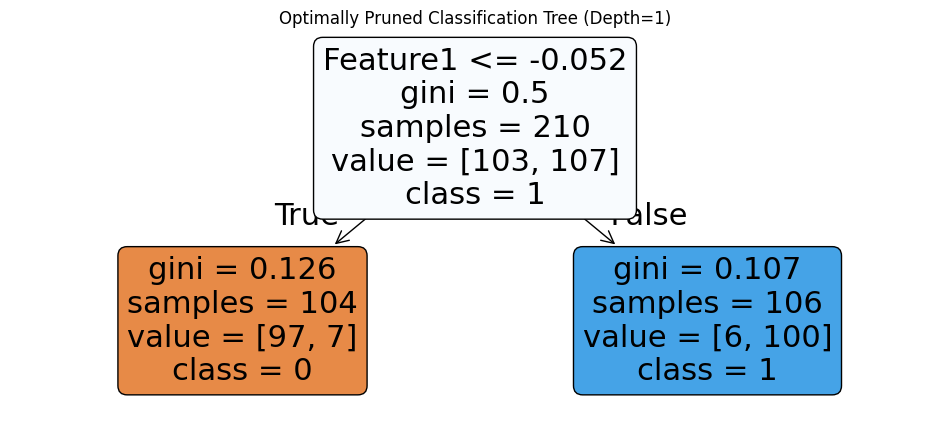

In [42]:
#part d;

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train the decision tree model with optimal pruning depth
classifier_final = DecisionTreeClassifier(criterion="gini", max_depth=best_depth)
classifier_final.fit(X_train_data, y_train_data)

# Visualize the pruned decision tree
plt.figure(figsize=(12, 5))
plot_tree(classifier_final, feature_names=['Feature1', 'Feature2'], class_names=['0', '1'], filled=True, rounded=True)
plt.title(f"Optimally Pruned Classification Tree (Depth={best_depth})")
plt.show()